In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
input_path='./01_数据input/'

In [4]:
df=pd.read_excel(input_path+'法定存款准备金率.xlsx',header=1)[:-6]
df=df.sort_values('公布时间')
df=df.iloc[2:]
df

,公布时间,生效时间,调整前,调整后,调整幅度,调整前.1,调整后.1,调整幅度.1
23,2010年05月02日,2010年05月10日,16.5,17.0,0.5,14.5,15.0,0.5
22,2010年11月10日,2010年11月16日,17.0,17.5,0.5,15.0,15.5,0.5
21,2010年11月19日,2010年11月29日,17.5,18.0,0.5,15.5,16.0,0.5
20,2010年12月10日,2010年12月20日,18.0,18.5,0.5,16.0,16.5,0.5
19,2011年01月14日,2011年01月20日,18.5,19.0,0.5,16.5,16.5,0.0
18,2011年02月18日,2011年02月24日,19.0,19.5,0.5,16.5,17.0,0.5
17,2011年03月18日,2011年03月25日,19.5,20.0,0.5,17.0,18.0,1.0
16,2011年04月17日,2011年04月21日,20.0,20.5,0.5,18.0,18.5,0.5
15,2011年05月12日,2011年05月18日,20.5,21.0,0.5,18.5,19.0,0.5
14,2011年06月14日,2011年06月20日,21.0,21.5,0.5,19.0,19.5,0.5


In [5]:
RRR_time=df['公布时间'].apply(lambda x:datetime.datetime.strptime(x,'%Y年%m月%d日'))
RRR_time

23   2010-05-02
22   2010-11-10
21   2010-11-19
20   2010-12-10
19   2011-01-14
18   2011-02-18
17   2011-03-18
16   2011-04-17
15   2011-05-12
14   2011-06-14
13   2011-11-30
12   2012-02-18
11   2012-05-12
10   2015-02-04
9    2015-04-19
8    2015-08-25
7    2015-10-23
6    2016-02-29
5    2018-04-17
4    2018-06-24
3    2018-10-07
2    2019-01-04
1    2019-09-06
0    2020-01-01
Name: 公布时间, dtype: datetime64[ns]

In [7]:
irs=pd.read_excel(input_path+'IRS_ALL.xlsx',index_col=0)
irs.index=pd.DatetimeIndex(irs.index)
irs

,收盘价
日期,
2010-04-19,2.1900
2010-04-20,2.1600
2010-04-21,2.1500
2010-04-22,2.1300
2010-04-23,2.1300
...,...
2020-09-24,2.4275
2020-09-25,2.4625
2020-09-28,2.4400


<AxesSubplot:xlabel='日期'>

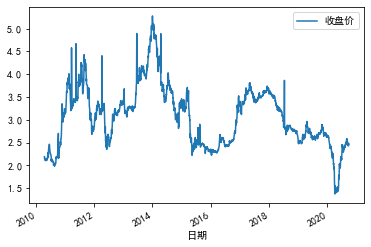

In [8]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
irs.plot()

In [9]:
# change=pd.DataFrame(index=RRR_time[RRR_time>'2010-04-19'],columns=['t1','t0','irs1','irs0'])
# for one in change.index:
#     t0=(irs[irs.index<one].index.max())
#     irs0=irs['收盘价'][t0]
#     if one in irs.index.tolist():
#         t1=one
#         irs1=irs['收盘价'][one]
#     else:
#         t1=irs[irs.index>one].index.min()
#         irs1=irs['收盘价'][t1]

#     change.loc[one]=t1,t0,irs1,irs0
# change['irs_change']=change['irs1']-change['irs0']
# change

## 此处尝试计算IRS冲击的方法，下面cell使用

* 冲击后：次日IRS
* 冲击前：当日或前一日（如果当日为非交易日）
* 也即冲击发生在我们所使用日期的收盘后？

得到的结果更为相似

同时作者使用应该是两者结合，也就是文中的方法


In [10]:
# irs.index.tolist()
#== 修改为？
#if one in list(map(lambda x : str(x)[:10],irs.index)):
# RRR_time

### 当日交易收盘后公布

In [11]:
change=pd.DataFrame(index=RRR_time[RRR_time>'2010-04-19'],columns=['t1','t0','irs1','irs0'])
for one in change.index:
    # 如果当天存在（为交易日）则当天收盘价为初始irs
    if one in irs.index.tolist():
        t0=one
        irs0=irs['收盘价'][one]
    # 否则前一天为初始irs
    else:
        t0=irs[irs.index<one].index.max()
        irs0=irs['收盘价'][t0]
    # 冲击后irs为后一天irs
    t1=(irs[irs.index>one].index.min())
    irs1=irs['收盘价'][t1]

    change.loc[one]=t1,t0,irs1,irs0
change['irs_change']=change['irs1']-change['irs0']
change

,t1,t0,irs1,irs0,irs_change
公布时间,,,,,
2010-05-02,2010-05-04 00:00:00,2010-04-29 00:00:00,2.15,2.135,0.015
2010-11-10,2010-11-11 00:00:00,2010-11-10 00:00:00,2.58,2.5663,0.0137
2010-11-19,2010-11-22 00:00:00,2010-11-19 00:00:00,2.97,2.7881,0.1819
2010-12-10,2010-12-13 00:00:00,2010-12-10 00:00:00,3.085,3.13,-0.045
2011-01-14,2011-01-17 00:00:00,2011-01-14 00:00:00,3.4,3.25,0.15
2011-02-18,2011-02-21 00:00:00,2011-02-18 00:00:00,4.01,3.83,0.18
2011-03-18,2011-03-21 00:00:00,2011-03-18 00:00:00,3.385,3.215,0.17
2011-04-17,2011-04-18 00:00:00,2011-04-15 00:00:00,3.385,3.38,0.005
2011-05-12,2011-05-17 00:00:00,2011-05-12 00:00:00,3.48,3.38,0.1


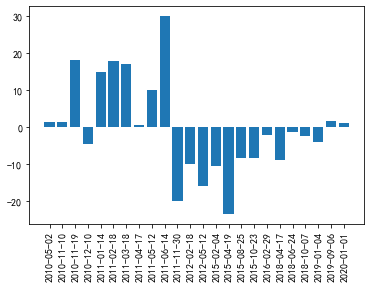

In [12]:
import re
x=df['公布时间'].apply(lambda x:re.sub('[^\x00-\xff]','-',x)[:-1])

# plt.figure(figsize=(10,7))
plt.bar(x,change['irs_change']*100)
plt.xticks(rotation=90)
plt.show()

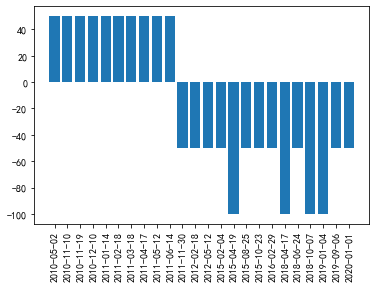

In [13]:
import re
# plt.figure(figsize=(10,7))
plt.bar(x,df['调整幅度']*100)
plt.xticks(rotation=90)
plt.show()

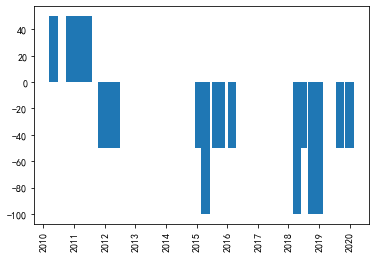

In [14]:
import re
# plt.figure(figsize=(10,7))
plt.bar(RRR_time,df['调整幅度']*100,width=100)
plt.xticks(rotation=90)
plt.show()

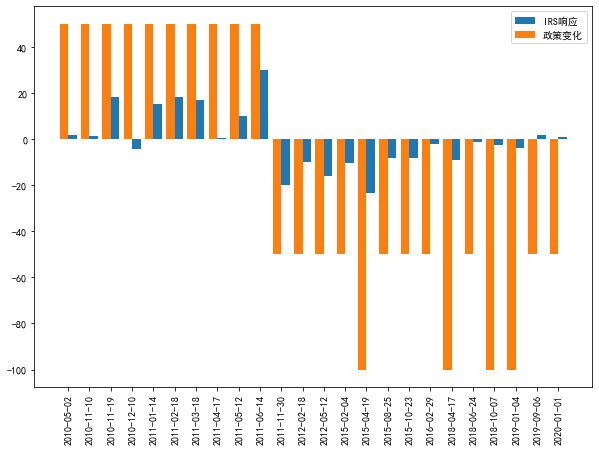

In [15]:
plt.figure(figsize=(10,7))

width=0.4

xx=np.array([i for i in range(len(x))])
x_tick=list(map(lambda x:str(x)[:10],change.index.tolist()))
plt.bar(xx+width/2,change['irs_change']*100,width=width)

y=df['调整幅度']
plt.bar(xx-width/2,y*100,width=width)

plt.legend(['IRS响应','政策变化'])
plt.xticks(xx,x,rotation=90)
plt.show()


## 接下来进行回归，首先计算当日响应(h=0)

$$∆y_{t+h,t-1} =α_h+β_hS_t+ε_{h,t}$$

In [17]:
sov_rate=pd.read_excel(input_path+'国债收益率.xlsx',index_col=0)
sov_rate.index=pd.DatetimeIndex(sov_rate.index)
sov_rate

,3m,6m,1y,3y,5y,10y
时间,,,,,,
2010-01-04,1.2372,1.4107,1.5000,2.4374,2.9584,3.6603
2010-01-05,1.2552,1.4088,1.5098,2.4591,2.9910,3.6606
2010-01-06,1.2577,1.4106,1.5238,2.4360,2.9912,3.6425
2010-01-07,1.2821,1.4126,1.5489,2.4542,3.0039,3.6543
2010-01-08,1.3221,1.4095,1.5411,2.4692,3.0340,3.6614
...,...,...,...,...,...,...
2020-10-10,2.3443,2.6010,2.7017,2.9872,3.1144,3.1898
2020-10-12,2.3747,2.6482,2.6937,3.0005,3.0893,3.1861
2020-10-13,2.3731,2.6576,2.6959,3.0026,3.1072,3.1950


In [18]:
def get_sov(tenor):
    sov=pd.DataFrame(index=RRR_time[RRR_time>'2010-04-19'],columns=['t1','t0','sov_rate1','sov_rate0'])

    for one in sov.index:
        # 与之前类似，如果当天为交易日，则本日收盘价为冲击前利率
        if one in sov_rate.index.tolist():
            t0=one
            sov_rate0=sov_rate[tenor][one]
        else:
            t0=sov_rate[sov_rate.index<one].index.max()
            sov_rate0=sov_rate[tenor][t0]
        t1=(sov_rate[sov_rate.index>one].index.min())
        sov_rate1=sov_rate[tenor][t1]

        sov.loc[one]=t1,t0,sov_rate1,sov_rate0
    sov['sov_rate_change']=sov['sov_rate1']-sov['sov_rate0']
    return sov
sov=get_sov('3m')
sov

,t1,t0,sov_rate1,sov_rate0,sov_rate_change
公布时间,,,,,
2010-05-02,2010-05-04 00:00:00,2010-04-30 00:00:00,1.3183,1.3186,-0.0003
2010-11-10,2010-11-11 00:00:00,2010-11-10 00:00:00,1.9147,1.8742,0.0405
2010-11-19,2010-11-22 00:00:00,2010-11-19 00:00:00,2.1133,2.0002,0.1131
2010-12-10,2010-12-13 00:00:00,2010-12-10 00:00:00,2.7343,2.6858,0.0485
2011-01-14,2011-01-17 00:00:00,2011-01-14 00:00:00,2.753,2.699,0.054
2011-02-18,2011-02-21 00:00:00,2011-02-18 00:00:00,2.9239,2.7675,0.1564
2011-03-18,2011-03-21 00:00:00,2011-03-18 00:00:00,2.5712,2.5,0.0712
2011-04-17,2011-04-18 00:00:00,2011-04-15 00:00:00,2.5487,2.5539,-0.0052
2011-05-12,2011-05-13 00:00:00,2011-05-12 00:00:00,2.714,2.5954,0.1186


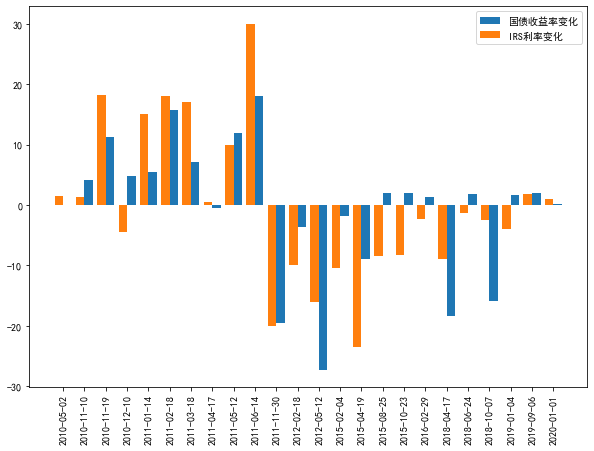

In [19]:
plt.figure(figsize=(10,7))

width=0.4

xx=np.array([i for i in range(len(x))])
x_tick=list(map(lambda x:str(x)[:10],sov.index.tolist()))
plt.bar(xx+width/2,sov['sov_rate_change']*100,width=width)

y=df['调整幅度']
plt.bar(xx-width/2,change['irs_change']*100,width=width)

plt.legend(['国债收益率变化','IRS利率变化'])
plt.xticks(xx,x,rotation=90)
plt.show()


In [20]:
import statsmodels.api as sm

def reg(sov):
    # 主权债收益率变化为y，irs变化为x
    Y,X=np.array(sov['sov_rate_change'].tolist()),np.array(change['irs_change'].tolist())
    X=sm.add_constant(X)
    mod=sm.OLS(Y,X)
    res=mod.fit()
    coef,p=res.params[1],res.pvalues[1]
    #print(coef,p)
#     return res.summary()
    return coef,p
reg(sov)

(0.6695531419055026, 4.685713317236454e-06)

In [21]:
tenor_list=['3m','6m','1y','3y','5y','10y']
est_result=pd.DataFrame(index=tenor_list,columns=['RRR','P_value'])
for tenor in tenor_list:
    sov=get_sov(tenor)
    coef,p=reg(sov)
    est_result.loc[tenor]=[coef,p]
est_result

,RRR,P_value
3m,0.669553,4.68571e-06
6m,0.63071,1.60286e-05
1y,0.599473,1.60774e-06
3y,0.369771,3.6568e-06
5y,0.375605,1.61876e-05
10y,0.326444,3.09646e-06


## 接下来我们将一日响应扩大到多日响应


In [22]:
def get_sov_nday(tenor,days):
    sov=pd.DataFrame(index=RRR_time[RRR_time>'2010-04-19'],columns=['t1','t0','sov_rate1','sov_rate0'])

    for one in sov.index:
        if one in sov_rate.index.tolist():
            t0=one
            sov_rate0=sov_rate[tenor][one]
        else:
            t0=sov_rate[sov_rate.index<one].index.max()
            sov_rate0=sov_rate[tenor][t0]
            
        t1=(sov_rate[sov_rate.index>one].index[days-1]) #主要修改了这里，n日响应对应index的n-1
        sov_rate1=sov_rate[tenor][t1]

        sov.loc[one]=t1,t0,sov_rate1,sov_rate0
    sov['sov_rate_change']=sov['sov_rate1']-sov['sov_rate0']
    return sov
sov_n=get_sov_nday('3m',1)
sov_n

,t1,t0,sov_rate1,sov_rate0,sov_rate_change
公布时间,,,,,
2010-05-02,2010-05-04 00:00:00,2010-04-30 00:00:00,1.3183,1.3186,-0.0003
2010-11-10,2010-11-11 00:00:00,2010-11-10 00:00:00,1.9147,1.8742,0.0405
2010-11-19,2010-11-22 00:00:00,2010-11-19 00:00:00,2.1133,2.0002,0.1131
2010-12-10,2010-12-13 00:00:00,2010-12-10 00:00:00,2.7343,2.6858,0.0485
2011-01-14,2011-01-17 00:00:00,2011-01-14 00:00:00,2.753,2.699,0.054
2011-02-18,2011-02-21 00:00:00,2011-02-18 00:00:00,2.9239,2.7675,0.1564
2011-03-18,2011-03-21 00:00:00,2011-03-18 00:00:00,2.5712,2.5,0.0712
2011-04-17,2011-04-18 00:00:00,2011-04-15 00:00:00,2.5487,2.5539,-0.0052
2011-05-12,2011-05-13 00:00:00,2011-05-12 00:00:00,2.714,2.5954,0.1186


In [23]:
tenor_list=['3m','6m','1y','3y','5y','10y']
# 1-7天的冲击
day_list=[i for i in range(1,8)]
est_result_nday=pd.DataFrame(index=tenor_list,columns=day_list)
for tenor in tenor_list:
    for day in day_list:
        sov=get_sov_nday(tenor,days=day) # 多日主权债收益率变化
        coef,p=reg(sov) #主权债收益率变化与irs变化回归
        est_result_nday.loc[tenor,day]=coef # 放入df中
est_result_nday

,1,2,3,4,5,6,7
3m,0.669553,0.89904,1.16844,1.18468,1.32486,1.45435,1.5483
6m,0.63071,0.835783,0.979162,0.965473,1.05297,1.16306,1.21971
1y,0.599473,0.79033,0.928698,0.927302,1.04364,1.09417,1.17509
3y,0.369771,0.517183,0.559398,0.414812,0.449736,0.518,0.521366
5y,0.375605,0.556792,0.588275,0.476202,0.49847,0.532477,0.541342
10y,0.326444,0.400161,0.411113,0.273108,0.297453,0.336412,0.358773


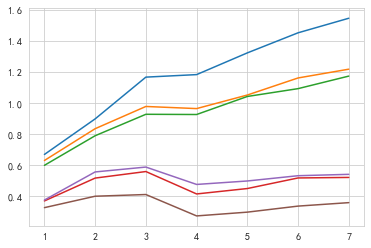

In [62]:
for year in tenor_list:
    plt.plot(est_result_nday.loc[year])
plt.show()

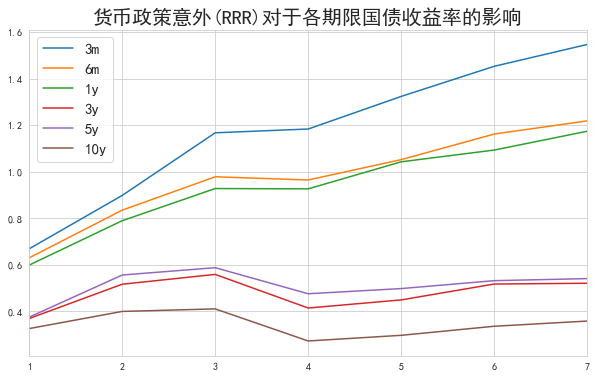

In [24]:

sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
plt.plot(est_result_nday.T)
plt.title('货币政策意外(RRR)对于各期限国债收益率的影响',size=20)
plt.legend(est_result_nday.index,fontsize=15)
# plt.grid()
plt.xlim(1,7)
plt.show()

# Proxy VAR

$$Y_t = c + \sum_{j=1}^p {B_jY_{t-j}} + DX_t +A_0ε_t$$

*Yt是内生变量的向量，包括人民银行的各种政策工具*


*Xt是国际外生变量的向量。*

简化形式（reduced-form）的VAR残差$u_t$是结构冲击的线性组合，$u_t =A_0ε_t$，因此简化形式的残差$E [u_tu_t']$的方差-协方差矩阵为$Ω= A_0A_0'$。

我们的目标是确定$A_0$对货币政策冲击的同时效应（contemporaneous effect）做出反应。

 我们的方法需要我们的指标进行验证：
$$
E（Z_t，ε_p^t）=α \not= 0
$$

$$
E（Z_t，ε_q^t）= 0
$$



In [25]:
from statsmodels.tsa.api import VAR
# help(VAR)

a='''
class VAR(statsmodels.tsa.base.tsa_model.TimeSeriesModel)
 |  VAR(endog, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Fit VAR(p) process and do lag order selection
 |  
 |  .. math:: y_t = A_1 y_{t-1} + \ldots + A_p y_{t-p} + u_t
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      2-d endogenous response variable. The independent variable.
 |  exog : array_like
 |      2-d exogenous variable.
 |  dates : array_like
 |      must match number of rows of endog
 '''

$y_t = A_1 y_{t-1} + \ldots + A_p y_{t-p} + u_t$  

# 读取数据

In [26]:
# 复制一遍上面的数据免得修改了
df_new=df
df_new.index=RRR_time
df_new.to_pickle('df_new.pkl')
df_new

,公布时间,生效时间,调整前,调整后,调整幅度,调整前.1,调整后.1,调整幅度.1
公布时间,,,,,,,,
2010-05-02,2010年05月02日,2010年05月10日,16.5,17.0,0.5,14.5,15.0,0.5
2010-11-10,2010年11月10日,2010年11月16日,17.0,17.5,0.5,15.0,15.5,0.5
2010-11-19,2010年11月19日,2010年11月29日,17.5,18.0,0.5,15.5,16.0,0.5
2010-12-10,2010年12月10日,2010年12月20日,18.0,18.5,0.5,16.0,16.5,0.5
2011-01-14,2011年01月14日,2011年01月20日,18.5,19.0,0.5,16.5,16.5,0.0
2011-02-18,2011年02月18日,2011年02月24日,19.0,19.5,0.5,16.5,17.0,0.5
2011-03-18,2011年03月18日,2011年03月25日,19.5,20.0,0.5,17.0,18.0,1.0
2011-04-17,2011年04月17日,2011年04月21日,20.0,20.5,0.5,18.0,18.5,0.5
2011-05-12,2011年05月12日,2011年05月18日,20.5,21.0,0.5,18.5,19.0,0.5


In [28]:
cpi=pd.read_excel(input_path+'ceic数据.xlsx',sheet_name='Sheet1',index_col=0)
cpi=cpi['2010-06':'2020-06'].iloc[:,[0,1,3,4,6]]
cpi.index=list(map(lambda x:str(x)[:7],cpi.index.tolist()))
# cpi=cpi.iloc[:,:-4]
cpi

,cpi,ppi,industry_yoy,m2yoy,shibor1w
2010-06,101.6,106.41,13.7,18.46,2.6192
2010-07,101.6,104.84,13.4,17.61,1.6825
2010-08,101.5,104.32,13.9,19.21,2.9489
2010-09,101.4,104.33,13.3,18.96,2.8408
2010-10,101.6,105.04,13.1,19.30,2.0211
...,...,...,...,...,...
2020-02,100.9,99.60,NaN,8.80,2.3740
2020-03,100.7,98.50,-1.1,10.10,2.1470
2020-04,100.4,96.90,3.9,11.10,1.9190
2020-05,100.4,96.30,4.4,11.10,2.1510


In [29]:
cpi['industry_yoy'].fillna(method='ffill',inplace=True)

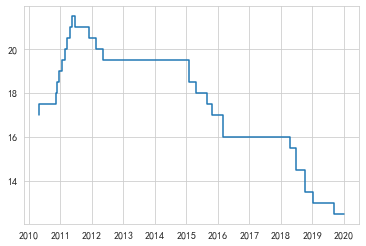

In [30]:
plt.step(df.index,df['调整后'])

In [31]:
now_rrr={}
for month in cpi.index:
    try:
        # 计算每月收盘rrr
        now_rrr[month]=df[df.index<month].iloc[-1]['调整后']
    except:
        now_rrr[month]=None
cpi['rrr']=now_rrr.values()
cpi.dropna(axis=0,inplace=True)
cpi

,cpi,ppi,industry_yoy,m2yoy,shibor1w,rrr
2010-06,101.6,106.41,13.7,18.46,2.6192,17.0
2010-07,101.6,104.84,13.4,17.61,1.6825,17.0
2010-08,101.5,104.32,13.9,19.21,2.9489,17.0
2010-09,101.4,104.33,13.3,18.96,2.8408,17.0
2010-10,101.6,105.04,13.1,19.30,2.0211,17.0
...,...,...,...,...,...,...
2020-02,100.9,99.60,6.9,8.80,2.3740,12.5
2020-03,100.7,98.50,-1.1,10.10,2.1470,12.5
2020-04,100.4,96.90,3.9,11.10,1.9190,12.5
2020-05,100.4,96.30,4.4,11.10,2.1510,12.5


In [32]:
# 加入irs月变化
irs_month={}
for month in cpi.index:
    try:
        irs_month[month]=round((irs[month].iloc[-1]-irs[month].iloc[0]).values[0],4)
    except:
        irs_month[month]=None
irs_month
cpi['irs_month']=irs_month.values()
cpi.dropna(axis=0,inplace=True)
cpi

,cpi,ppi,industry_yoy,m2yoy,shibor1w,rrr,irs_month
2010-06,101.6,106.41,13.7,18.46,2.6192,17.0,0.0300
2010-07,101.6,104.84,13.4,17.61,1.6825,17.0,-0.1600
2010-08,101.5,104.32,13.9,19.21,2.9489,17.0,-0.0600
2010-09,101.4,104.33,13.3,18.96,2.8408,17.0,0.1550
2010-10,101.6,105.04,13.1,19.30,2.0211,17.0,-0.3357
...,...,...,...,...,...,...,...
2020-02,100.9,99.60,6.9,8.80,2.3740,12.5,-0.1775
2020-03,100.7,98.50,-1.1,10.10,2.1470,12.5,-0.3800
2020-04,100.4,96.90,3.9,11.10,1.9190,12.5,-0.4425
2020-05,100.4,96.30,4.4,11.10,2.1510,12.5,0.2400


In [34]:
# 美债一年期
us_bond=pd.read_excel(input_path+'美债收益率.xlsx',index_col=0).iloc[3:-6]
us_bond.index=pd.DatetimeIndex(us_bond.index)
us_bond.sort_index(inplace=True)
us_bond=us_bond['2010':'2020-06']['美国国债收益率曲线:1年']
# us_bond.plot()

In [35]:
# 美债收益率，可以简化
us_month={}
for month in cpi.index:
    try:
        us_month[month]=us_bond[month].iloc[-1]
    except:
        us_month[month]=None
us_month
cpi['us_month']=us_month.values()
cpi.dropna(axis=0,inplace=True)
cpi

,cpi,ppi,industry_yoy,m2yoy,shibor1w,rrr,irs_month,us_month
2010-06,101.6,106.41,13.7,18.46,2.6192,17.0,0.0300,0.32
2010-07,101.6,104.84,13.4,17.61,1.6825,17.0,-0.1600,0.29
2010-08,101.5,104.32,13.9,19.21,2.9489,17.0,-0.0600,0.25
2010-09,101.4,104.33,13.3,18.96,2.8408,17.0,0.1550,0.27
2010-10,101.6,105.04,13.1,19.30,2.0211,17.0,-0.3357,0.22
...,...,...,...,...,...,...,...,...
2020-02,100.9,99.60,6.9,8.80,2.3740,12.5,-0.1775,0.97
2020-03,100.7,98.50,-1.1,10.10,2.1470,12.5,-0.3800,0.17
2020-04,100.4,96.90,3.9,11.10,1.9190,12.5,-0.4425,0.16
2020-05,100.4,96.30,4.4,11.10,2.1510,12.5,0.2400,0.17


In [36]:
cpi['cpi']

2010-06    101.6
2010-07    101.6
2010-08    101.5
2010-09    101.4
2010-10    101.6
           ...  
2020-02    100.9
2020-03    100.7
2020-04    100.4
2020-05    100.4
2020-06    100.3
Name: cpi, Length: 121, dtype: float64

<AxesSubplot:>

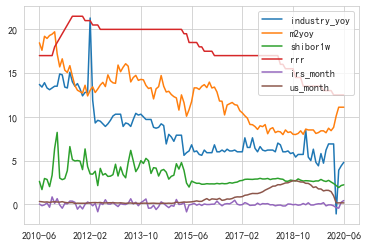

In [37]:
cpi.iloc[:,2:].plot()

In [38]:
"""
class VAR(statsmodels.tsa.base.tsa_model.TimeSeriesModel)
 |  VAR(endog, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Fit VAR(p) process and do lag order selection
 |  
 |  .. math:: y_t = A_1 y_{t-1} + \ldots + A_p y_{t-p} + u_t
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      2-d endogenous response variable. The independent variable.
 |  exog : array_like
 |      2-d exogenous variable.
 |  dates : array_like
 |      must match number of rows of endog
 """;

In [39]:
endog=['rrr','cpi','industry_yoy','m2yoy','shibor1w']
exog=['us_month']
model=VAR(cpi.loc[:,endog],exog=cpi.loc[:,exog])

C:\Users\zikepeng\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [40]:
cpi[endog+exog]#.to_excel('VAR用的外生内生.xlsx')

,rrr,cpi,industry_yoy,m2yoy,shibor1w,us_month
2010-06,17.0,101.6,13.7,18.46,2.6192,0.32
2010-07,17.0,101.6,13.4,17.61,1.6825,0.29
2010-08,17.0,101.5,13.9,19.21,2.9489,0.25
2010-09,17.0,101.4,13.3,18.96,2.8408,0.27
2010-10,17.0,101.6,13.1,19.30,2.0211,0.22
...,...,...,...,...,...,...
2020-02,12.5,100.9,6.9,8.80,2.3740,0.97
2020-03,12.5,100.7,-1.1,10.10,2.1470,0.17
2020-04,12.5,100.4,3.9,11.10,1.9190,0.16
2020-05,12.5,100.4,4.4,11.10,2.1510,0.17


In [41]:
from statsmodels.tsa.stattools import adfuller


In [42]:
cpi['rrr'].diff(1)

2010-06    NaN
2010-07    0.0
2010-08    0.0
2010-09    0.0
2010-10    0.0
          ... 
2020-02   -0.5
2020-03    0.0
2020-04    0.0
2020-05    0.0
2020-06    0.0
Name: rrr, Length: 121, dtype: float64

rrr需要一阶差分

In [43]:
'''
 Returns
    -------
    adf : float
        The test statistic.
    pvalue : float
        MacKinnon's approximate p-value based on MacKinnon (1994, 2010).
    usedlag : int
        The number of lags used.
    nobs : int
        The number of observations used for the ADF regression and calculation
        of the critical values.
    critical values : dict
        Critical values for the test statistic at the 1 %, 5 %, and 10 %
        levels. Based on MacKinnon (2010).
    icbest : float
        The maximized information criterion if autolag is not None.
    resstore : ResultStore, optional
        A dummy class with results attached as attributes.
        '''
# 统计量，p值，滞后阶数，观测值，临界值，
adfuller(cpi['cpi'],maxlag=2)


(-1.1557434412550487,
 0.6923383590936228,
 0,
 120,
 {'1%': -3.486055829282407,
  '5%': -2.8859430324074076,
  '10%': -2.5797850694444446},
 -39.14994452417994)

In [44]:
adfuller(cpi['industry_yoy'])


(-1.2964432701388438,
 0.6307979468641418,
 7,
 113,
 {'1%': -3.489589552580676,
  '5%': -2.887477210140433,
  '10%': -2.580604145195395},
 393.14220242398005)

<AxesSubplot:>

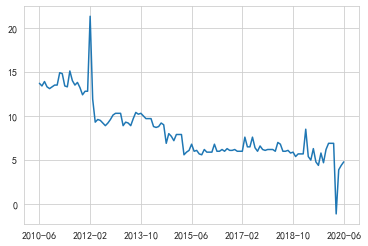

In [45]:
cpi['industry_yoy'].plot()

In [46]:
# model

In [47]:
# help(adfuller)
adfuller(cpi['industry_yoy'])

(-1.2964432701388438,
 0.6307979468641418,
 7,
 113,
 {'1%': -3.489589552580676,
  '5%': -2.887477210140433,
  '10%': -2.580604145195395},
 393.14220242398005)

In [48]:
result=model.fit(4)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 21, May, 2021
Time:                     01:11:13
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -3.74369
Nobs:                     117.000    HQIC:                  -5.28629
Log likelihood:          -349.154    FPE:                 0.00180362
AIC:                     -6.34060    Det(Omega_mle):     0.000762081
--------------------------------------------------------------------
Results for equation rrr
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                 -19.212527         7.965250           -2.412           0.016
us_month               -0.109908         0.062885           -1.748           0.081
L1.rrr                  0.862810         0.098188     

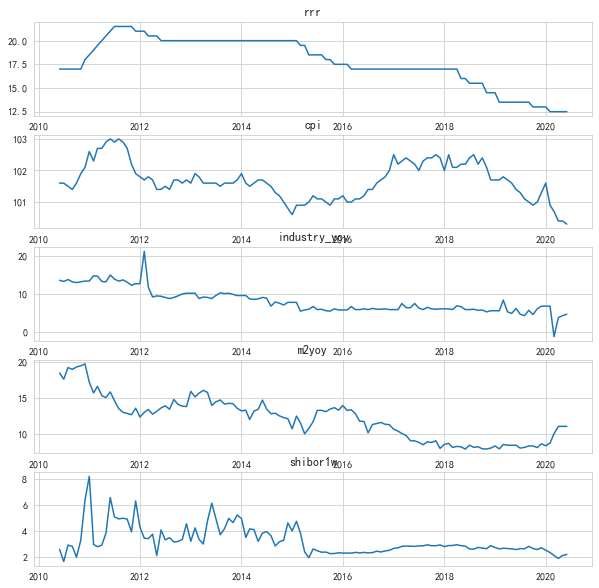

In [49]:
result.plot();

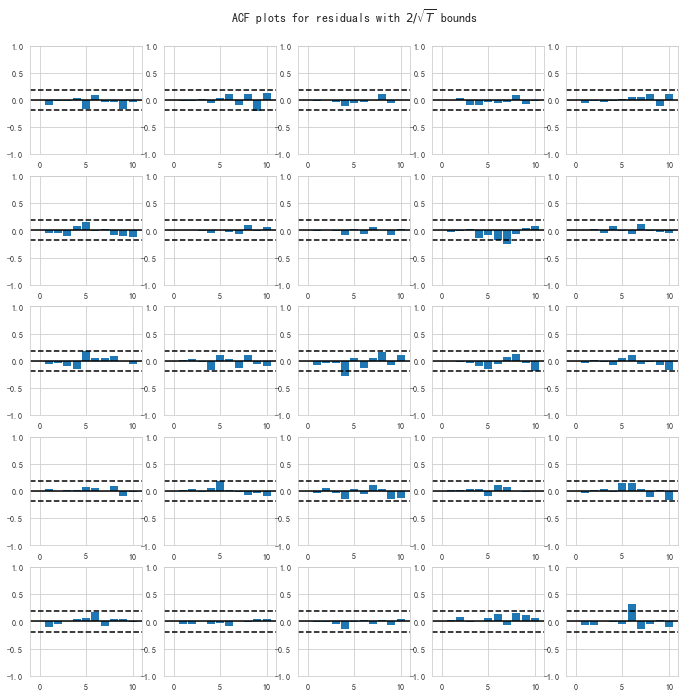

In [50]:
result.plot_acorr();

In [51]:
# help(results.forecast)

In [52]:
# help(model.fit)

In [53]:
# model.select_order(15)
results = model.fit(maxlags=15,ic='fpe')# maxlags=15, 
print(results.k_ar)
# results = model.fit(maxlags=15,ic='aic')# maxlags=15, 
results=model.fit(4)

1


In [54]:
lag_order = results.k_ar
print(lag_order)
# results.forecast(cpi.loc[:,endog].values[-lag_order:], 5 ,exog_future=np.zeros(5)) # 此处需要加入外生变量值

4


In [55]:
# results.plot_forecast(5)


Orthogonalization is done using the Cholesky decomposition of the estimated error covariance matrix Σ^u and hence interpretations may change depending on variable ordering.

In [56]:
help(results.irf().plot)

Help on method plot in module statsmodels.tsa.vector_ar.irf:

plot(orth=False, *, impulse=None, response=None, signif=0.05, plot_params=None, figsize=(10, 10), subplot_params=None, plot_stderr=True, stderr_type='asym', repl=1000, seed=None, component=None) method of statsmodels.tsa.vector_ar.irf.IRAnalysis instance
    Plot impulse responses
    
    Parameters
    ----------
    orth : bool, default False
        Compute orthogonalized impulse responses
    impulse : {str, int}
        variable providing the impulse
    response : {str, int}
        variable affected by the impulse
    signif : float (0 < signif < 1)
        Significance level for error bars, defaults to 95% CI
    subplot_params : dict
        To pass to subplot plotting funcions. Example: if fonts are too big,
        pass {'fontsize' : 8} or some number to your taste.
    plot_params : dict
    
    figsize : (float, float), default (10, 10)
        Figure size (width, height in inches)
    plot_stderr : bool, defa

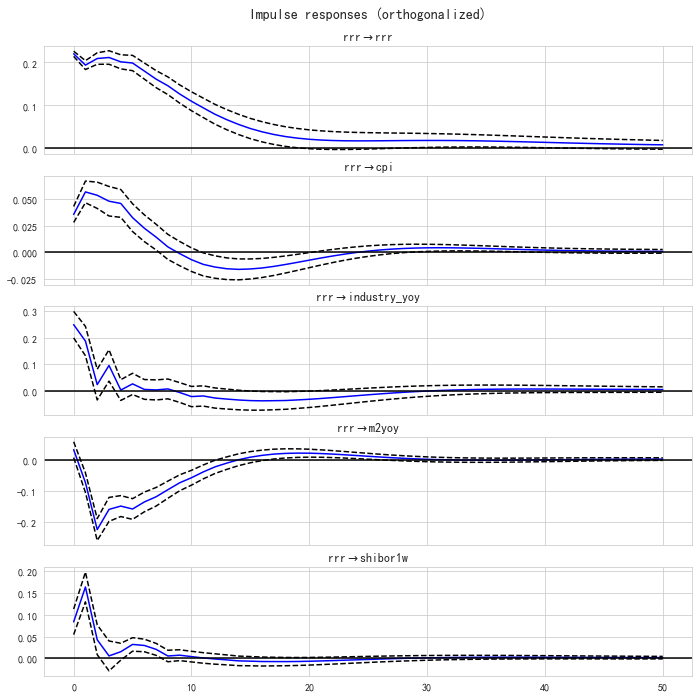

In [57]:
irf = results.irf(50)
irf.plot(orth=True,signif =0.68,impulse='rrr'); # 0.68的显著性水平


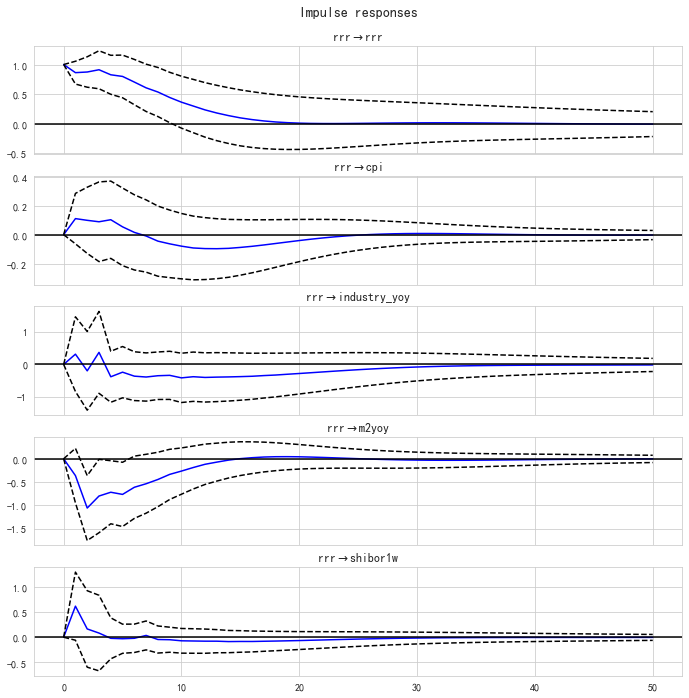

In [58]:
irf.plot(impulse='rrr',orth=False);

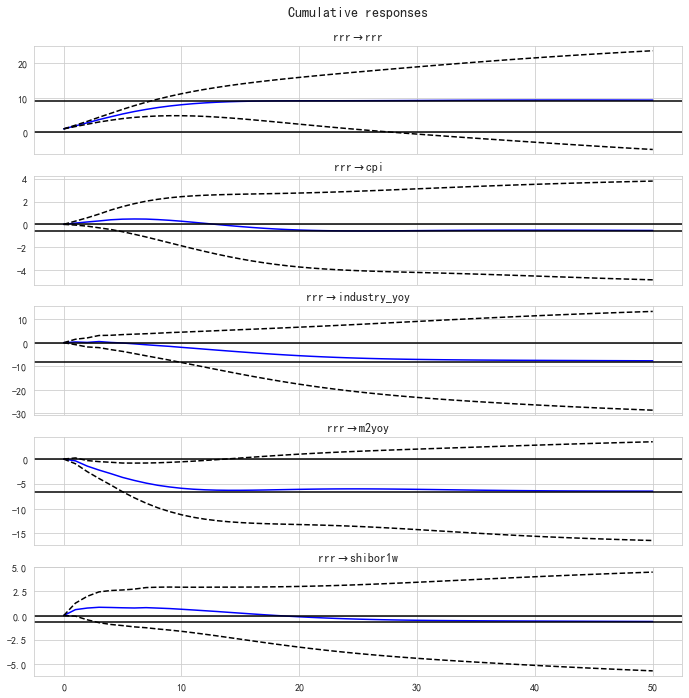

In [59]:
irf.plot_cum_effects(orth=False,impulse='rrr');

In [60]:
fevd = results.fevd(5)
fevd.summary()

FEVD for rrr
          rrr       cpi  industry_yoy     m2yoy  shibor1w
0    1.000000  0.000000      0.000000  0.000000  0.000000
1    0.958043  0.004535      0.004934  0.006975  0.025513
2    0.907925  0.062827      0.003698  0.007595  0.017956
3    0.901697  0.072740      0.002777  0.005986  0.016800
4    0.856740  0.113931      0.002680  0.012417  0.014232

FEVD for cpi
          rrr       cpi  industry_yoy     m2yoy  shibor1w
0    0.031708  0.968292      0.000000  0.000000  0.000000
1    0.062712  0.914741      0.008774  0.003298  0.010475
2    0.069579  0.891065      0.011697  0.003163  0.024495
3    0.071174  0.882309      0.010333  0.003592  0.032592
4    0.074422  0.863334      0.010685  0.006775  0.044784

FEVD for industry_yoy
          rrr       cpi  industry_yoy     m2yoy  shibor1w
0    0.035764  0.015250      0.948985  0.000000  0.000000
1    0.047617  0.065923      0.879951  0.001998  0.004510
2    0.042822  0.059169      0.811194  0.013260  0.073555
3    0.043680  0.07277

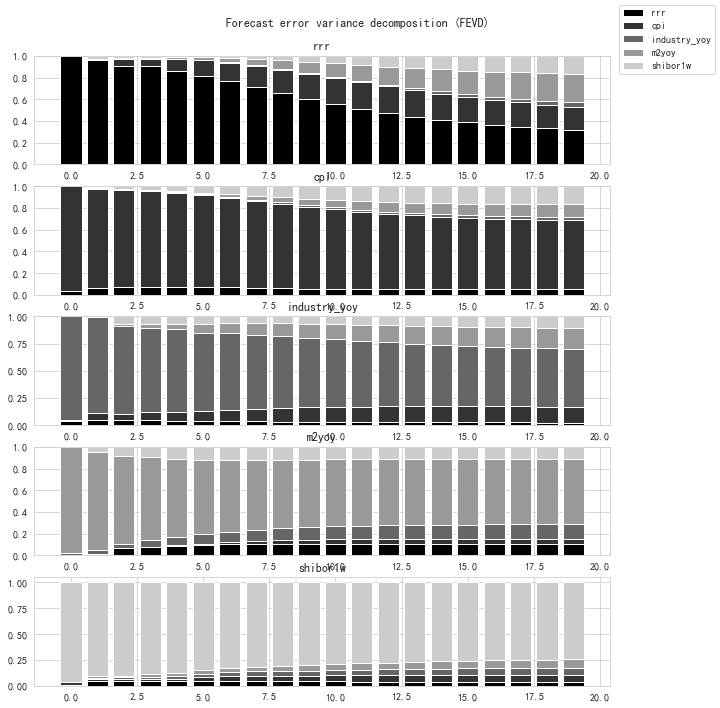

In [61]:
results.fevd(20).plot();

Granger causality

One is often interested in whether a variable or group of variables is “causal” for another variable, for some definition of “causal”. In the context of VAR models, one can say that a set of variables are Granger-causal within one of the VAR equations. We will not detail the mathematics or definition of Granger causality, but leave it to the reader. The VARResults object has the test_causality method for performing either a Wald (χ2) test or an F-test.

In [62]:
results.test_causality('rrr', ['cpi', 'm2yoy'], kind='f')